# **H1N1 Vaccine Logistic Regression Analysis**

# **Objective**
This project aims to **predict whether an individual is likely to receive the H1N1 vaccine based on various behavioral, demographic, and medical factors**. By leveraging logistic regression, the project identifies key factors influencing vaccination behavior and provides insights to improve vaccine uptake and public health strategies.

# **Dataset Description**
The dataset contains information on individuals' characteristics, behaviors, and vaccination status against H1N1. Key features include:

**H1N1 Worry and Awareness:** Measures the level of concern and knowledge about the H1N1 virus.                                    
**Preventive Behaviors:** Actions such as avoiding contact, using face masks, washing hands frequently, avoiding large gatherings, and reducing time outside.                                          
 **Demographics:** Information about race, gender, income level, marital status, and housing status.                                      
**Other Factors:** Employment status, census location type (MSA or non-MSA), and the number of adults and children in the household.           
**Target Variable:** h1n1_vaccine (1 for vaccinated, 0 for not vaccinated).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/aishuej/dataset/main/167541607652060ec2379f8793842aa5b168a_%20(1).csv")
# Displaying the first few rows of the dataset
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
# Performing basic data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
#df = df.drop('unique_id', axis=1)
df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
# Handling missing values
df = df.fillna(df.mode().iloc[0])  # Fill missing values with the mode# mode 2,3 25,26
df


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
for i in range(5):
  print(i)

0
1
2
3
4


In [ ]:
a=[]
for col in df.select_dtypes(include=['number']).columns:
    #print(col)
    a.append(col)
print(a)


['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children', 'h1n1_vaccine']


In [ ]:
df1=df[['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children', 'h1n1_vaccine']]

In [ ]:
a=[]
for col in df.select_dtypes(include=['object']).columns:
    a.append(col)

# Generate count plots for each categorical column


In [ ]:
b=[11,2,3,4]
for i,a in enumerate(b,1):
  print(i,a)


1 11
2 2
3 3
4 4


<Axes: >

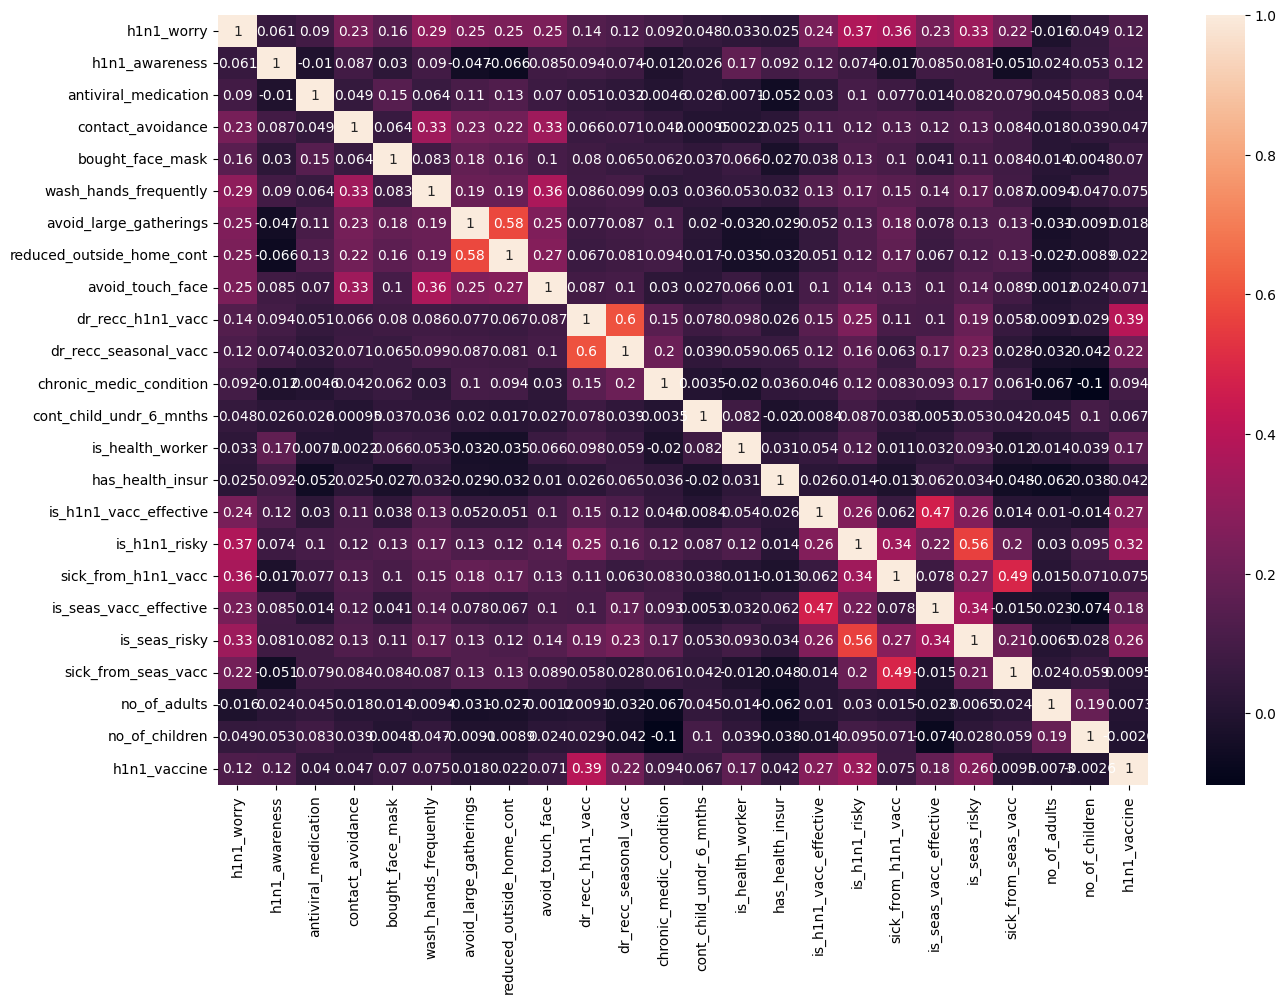

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,fmt='.1f')

In [ ]:
df1.corr()


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017896,0.003473,-0.008458,0.008912,-0.006654,0.011212,0.004455,0.009181,0.007606,...,-0.009476,0.005753,0.000830,-0.002379,0.005880,-0.005545,0.008849,0.000172,-0.003650,-0.003280
h1n1_worry,0.017896,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,...,0.024724,0.235841,0.372716,0.355637,0.231649,0.327986,0.220568,-0.016079,0.049441,0.121574
h1n1_awareness,0.003473,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,...,0.092251,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.050857,0.023866,0.053378,0.117771
antiviral_medication,-0.008458,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,...,-0.051810,0.030172,0.102553,0.076930,0.014498,0.081503,0.078618,0.044829,0.083090,0.040226
contact_avoidance,0.008912,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,...,0.025377,0.109066,0.116259,0.129983,0.117356,0.127991,0.084346,0.017995,0.038977,0.046837
bought_face_mask,-0.006654,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,...,-0.027177,0.037679,0.128316,0.104655,0.040889,0.105917,0.084084,0.014191,0.004794,0.070413
wash_hands_frequently,0.011212,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,...,0.032339,0.134815,0.167414,0.148739,0.136936,0.170655,0.087218,0.009367,0.047451,0.074570
avoid_large_gatherings,0.004455,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,...,-0.028658,0.052432,0.125076,0.183517,0.078208,0.130800,0.131414,-0.030994,-0.009126,0.018089
reduced_outside_home_cont,0.009181,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,...,-0.031898,0.050866,0.123348,0.171669,0.066861,0.117428,0.133080,-0.026542,-0.008937,0.022080
avoid_touch_face,0.007606,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,...,0.010219,0.101776,0.144442,0.130461,0.104530,0.141537,0.089156,-0.001233,0.023739,0.070855


In [ ]:
# Loop through all columns in the DataFrame and apply LabelEncoder to categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with encoded columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [ ]:

# Splitting the dataset into training and testing sets
x = df.drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']
from imblearn.over_sampling import SMOTE

# Step 2: Apply SMOTE to balance the classes in the training set
smote = SMOTE()
x1,y1 = smote.fit_resample(x, y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
# Step 3: Training Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(x_train1, y_train1)

# Step 4: Model Evaluation
y_pred1 = logreg.predict(x_test1)
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy)


Accuracy: 0.8240359415949082


In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

selector = VarianceThreshold(threshold=0.2)

# Fit and transform your feature matrix
X_train_high_variance = selector.fit_transform(X_train)
X_test_high_variance = selector.transform(X_test)

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_high_variance, y_train)

# Make predictions on the test data
predictions = logreg.predict(X_test_high_variance)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(X_train_high_variance.shape)

Accuracy: 0.8058779483339573


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, .001], 'penalty': ['l2', 'l1']}
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# Fit the grid search on the training data
grid_search.fit(x_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Initialize a new LogisticRegression instance with the best hyperparameters
best_model = LogisticRegression(**best_params)
# Train the best model on the training data
best_model.fit(x_train, y_train)
# Predict on the test set
y_pred1 = best_model.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.8244103332085362


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression  # Assuming a logistic regression model, replace with your classifier

var = VarianceThreshold(threshold=0.25)
x_trans = var.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.2, random_state=42)

# Replace with your classification model
model = LogisticRegression()
log_with_var = model.fit(x_train, y_train)

pred = log_with_var.predict(x_test)

accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7822912766754024
Confusion Matrix:
 [[4054  158]
 [1005  125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      4212
           1       0.44      0.11      0.18      1130

    accuracy                           0.78      5342
   macro avg       0.62      0.54      0.53      5342
weighted avg       0.73      0.78      0.73      5342



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import uniform

# Define the hyperparameter distribution
param_grid = {'C': [0.1, 1, 0.001], 'penalty': ['l2', 'l1']}#c alpha pen lassso ridge

# Initialize LogisticRegression
logreg = LogisticRegression()

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(logreg,param_grid, n_iter=10, cv=5)

# Fit the random search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params1 = random_search.best_params_

# Initialize a new LogisticRegression instance with the best hyperparameters
best_model = LogisticRegression(**best_params1)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred2 = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

Accuracy: 0.8244103332085362


**The H1N1 Vaccine Logistic Regression project** leveraged various data preprocessing and model optimization techniques to enhance its predictive accuracy. These methodologies played a crucial role in identifying influential factors and improving model performance:

**SMOTE (Synthetic Minority Oversampling Technique) **addressed class imbalance effectively, increasing model performance with an accuracy of 82% by balancing the target variable distribution.

**Threshold Tuning** optimized the classification threshold, achieving 80% accuracy by ensuring an appropriate trade-off between sensitivity and specificity.

**GridSearchCV** systematically fine-tuned hyperparameters, yielding a robust model with an accuracy of 82% by exploring a grid of potential hyperparameter combinations.

**Variance Threshold** removed low-variance features, streamlining the model and maintaining an accuracy of 78%, ensuring the model focused on impactful predictors.

**RandomizedSearchCV** accelerated the hyperparameter search process, achieving 82% accuracy by exploring a randomized subset of hyperparameters efficiently.

These techniques enhanced the logistic regression model's reliability and predictive power, with consistent performance metrics across methods. The analysis provided actionable insights into behavioral and demographic factors driving H1N1 vaccination decisions.

The project demonstrates the importance of advanced preprocessing and optimization techniques in achieving robust, data-driven insights. By identifying key predictors and enhancing prediction accuracy, this project contributes to targeted public health interventions aimed at increasing vaccination coverage and addressing vaccine hesitancy.